<img align="right" width="250" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Cluster-2.svg/601px-Cluster-2.svg.png">

# Clustering with Python

This notebook contains an overview of basic python functionalities for clustering using the [sklearn](http://scikit-learn.org/stable/) library.  
Note: this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

Import of the basic packages to use

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
DATASET = "/home/iridescent/Documents/IML/_data/Dataset/Dataset Visti a Lezione/"

<img align="right" width="150" src="https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg">

## Iris Dataset  
[Link](https://archive.ics.uci.edu/ml/datasets/iris) to the dataset on the UCI Machine Learning Repository.  
As first step we load the whole Titanic Dataset and make confidence with its features.  

In [5]:
df = pd.read_csv(DATASET + "iris.csv", 
                 sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  
The predictive attribute is the class of the iris plant. 

Fetures:
* sepal length (in cm)
* sepal width (in cm)
* petal length (in cm) 
* petal width (in cm) 
* class: Iris-setosa, Iris-versicolour, Iris-virginica

Since clustering is an ***unsupervised*** task we save the class attribute in a variable and we remove it from the dataframe.

In [7]:
classes = df['class']
df = df.drop('class',axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Clustering Objective
Grouping a set of instances such that the instances in the same cluster are more ***similar*** (in some sense) to each other than to those in other clusters.  
The result of a clustering algorithm is a ***clustering***, that is a set of clusters.
Clustering is an ***unsupervised*** task, i.e., the real cluster partitioning is unknown.  

## Different Types of Clusterings and Clusters

Principal Types of Clustering:
* **Partitional Clustering:** division into non-overlapping clusters, i.e., each instance is only in one cluster
* Hierarchical Clustering: set of nested clusters organized as a hierarchical tree

Principal Types of Clusters:
* **Center-based:** the calculus is based on a centroid (K-Means)
* **Density-based:** the calculus is based on a concept of neighborhood and density (DBSCAN)

## Clustering Preprocessing - Normalization  
A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Standard Scaler
### $z = \frac{(x - u)}{ s}$

where $u$ is the mean of the training samples, and $s$ is the standard deviation of the training samples.

Scaler can be used to store model from training data

In [7]:
scaler = StandardScaler()
scaler.fit(df.values)

StandardScaler()

In [8]:
df.head().values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
s = scaler.transform(df.values)

In [10]:
s

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [11]:
scaler.inverse_transform(s)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### MinMaxScaler

### $z = \frac{x - x_{min}}{x_{max}-x_{min}}$

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

In [13]:
X[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

# K-Means

## The Algorithm in a Nutshell

**Objective:** Clusters the data into $k$ groups.
* **Init step:** Select k points at random as cluster centers.
* **Assignment step:** Assign each instance to the cluster with the closest mean according to the distance function.
* **Update step**: Calculate the new means to be the centroids of the instances in the new clusters.
* ***Repeat*** steps 2 and 3 until the assignment no longer change.

There is no guarantee that the optimum is found using this algorithm.

> Tan, P. N. (2006). Introduction to data mining. Pearson Education India.

Running [example](http://matlaspisa.isti.cnr.it:5055/K-Means)
Wikipedia [link](https://en.wikipedia.org/wiki/K-means_clustering)

## K-Means Problems

* Initial Centroids
* Number of clusters

## K-Means in Python  ([sklearn](http://scikit-learn.org/stable/modules/clustering.html#k-means))

In [14]:
from sklearn.cluster import KMeans

Parameters:
* **n_clusters** (default 8): The number of clusters
* **n_init** (default 10): Number of time k-means will be run with different initial centroids. The final results will be the best output in terms of inertia.
* **max_iter** (default 300): Maximum number of iterations of the k-means algorithm for a single run.

In [15]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

Output:
* **labels_**: Labels of each point
* **cluster\_centers_**: Coordinates of cluster centers
* **inertia_**: Sum of squared distances of samples to their closest cluster center.

Labels

In [16]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [21]:
classes.values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [17]:
len(kmeans.labels_)

150

Observing the size of each cluster

In [93]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([61, 50, 39]))

In [24]:
np.unique(classes.values, return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50]))

In [25]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 50, 1: 39, 2: 61}

Visualization of the clustering in two dimensions.

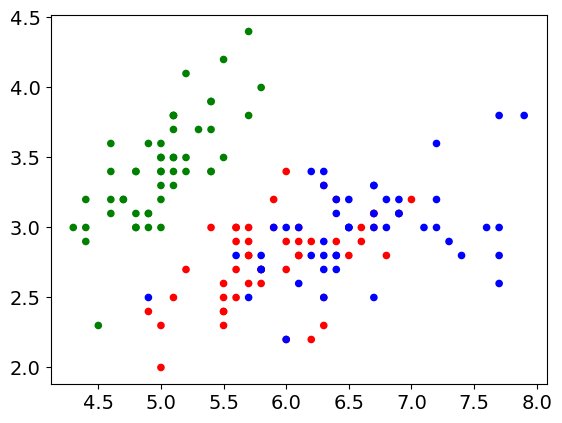

In [30]:
plt.scatter(df['sepal_length'], df['sepal_width'], 
            c=['g']*50+['r']*50+['b']*50, s=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

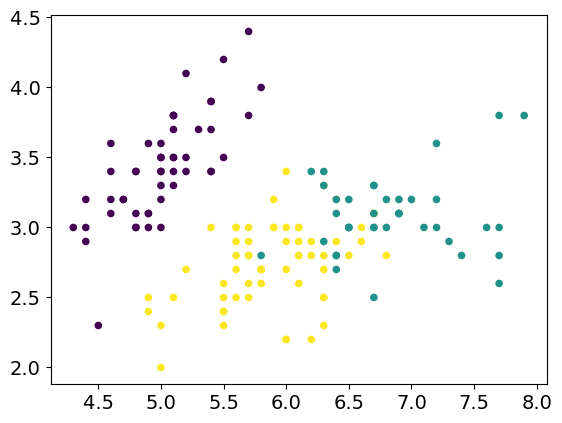

In [29]:
plt.scatter(df['sepal_length'], df['sepal_width'], 
            c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

Centers

In [31]:
kmeans.cluster_centers_

array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

In [32]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [33]:
centers

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.84615385, 3.08205128, 5.7025641 , 2.07948718],
       [5.88852459, 2.73770492, 4.39672131, 1.41803279]])

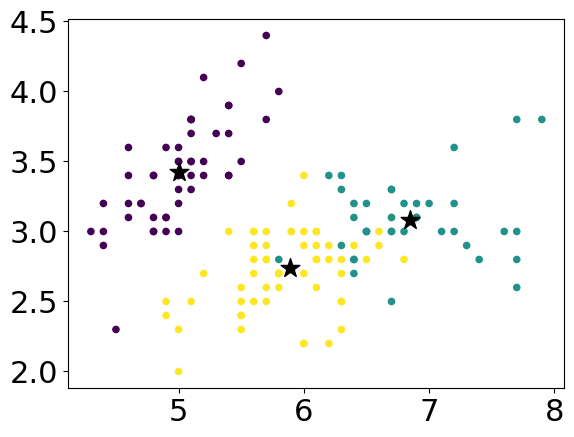

In [34]:
plt.scatter(df['sepal_length'], df['sepal_width'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Visualization of clusters centers by means of parallel coordinates

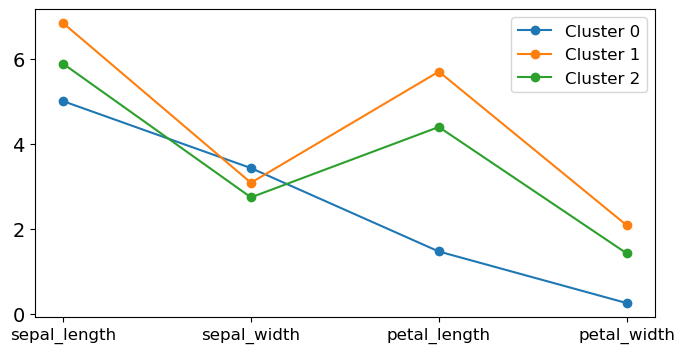

In [38]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=12)
plt.legend(fontsize=12)
plt.show()

Visualize centroids by radar chart

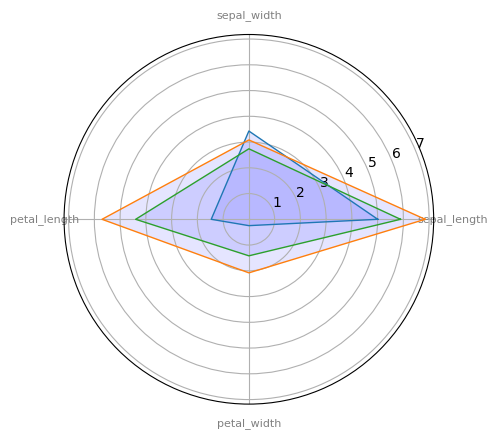

In [39]:
from math import pi
 
# number of variable
N = len(df.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], df.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)


## Evaluating clusters
### SSE = $\sum_{i=1}^{n} (x_i - \bar{x_i})^2$

### Internal Evaluation

#### Silhouette
calculated using the mean intra-cluster distance (dissimilarity) $a$ and the mean nearest-cluster distance (dissimilarity) $b$ for each sample. The Silhouette Coefficient for a sample is $(b - a) / max(a, b)$.

To clarify, $b$ is the distance between a sample and the nearest cluster that the sample is not a part of. 

Note that Silhouette Coefficient is only defined if number of labels is $2 <= n_{labels} <= n_{samples} - 1$.

Silhouette ranges from -1 to 1. -1: probably wrong cluster. 0: cluster overlap. 1: cluster is dense and well separated.

#### Davies-Bouldin score.
Defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. 

For each cluster $s_i$ is the average distance between each point in cluster $i$ and the centroid of $i$, $d_{ij}$ is the distance between centroids of clusters $i$ and $j$

$DB_{score}$ = $\frac{1}{k}$ $\sum_{i=1}^{k} (max (\frac{s_i - s_j}{d_{ij}}))$

Thus, clusters which are farther apart and less dispersed will result in a better score, closer to 0.

In [41]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % metrics.silhouette_score(X, kmeans.labels_))
print('DB Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_))


SSE 6.982216473785235
Silhouette 0.5047687565398589
DB Separation 0.760277053129555


### External evaluation

Given the knowledge of the ground truth.

Recall confusion matrix:

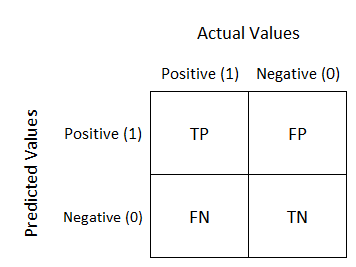


#### Adjusted Rand Index

An ARI score of 0 indicates that cluster labels are randomly assigned, and an ARI score of 1 means that the true labels and predicted labels form identical clusters.

The rand index is: $RI = \frac{TP + TN}{TP+TN+FP+FN}$

The expected rand index is: $ E[RI] = \frac{(TP+TN)*(TP+FP)}{TP+TN+FP+FN}$

The ARI is: $ARI = \frac{RI - E[RI]}{max(RI) - E[RI]}$

In [42]:
#Similarity between assignments
metrics.adjusted_rand_score(classes, kmeans.labels_)

0.7163421126838476

In [43]:
#are cluster composed of objects with the same real labels?
metrics.homogeneity_score(classes, kmeans.labels_) #homogenity score

0.7364192881252849

In [44]:
#are real labels concentrated in specific clusters?
metrics.completeness_score(classes, kmeans.labels_)

0.7474865805095324

In [45]:
#harmonic mean between completeness_score and homogeneity_score
metrics.v_measure_score(classes, kmeans.labels_, beta=2) 

0.7437607061642307

### How to select the right k
Knee Method to estimate the best K

In [46]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

In [47]:
sse_list

[12.127790750538194,
 6.982216473785234,
 5.516933472040371,
 4.58977540011789,
 3.9254184157287577,
 3.4744371735523103,
 3.143255166114556,
 2.8624299661283605,
 2.5476715009822835]

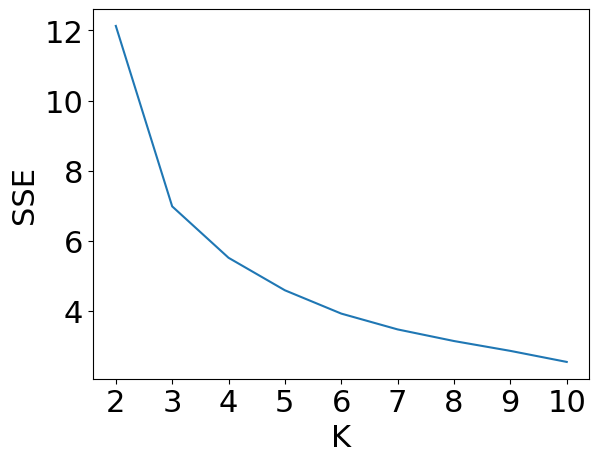

In [48]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks([2,3,4,5,6,7,8,9,10])
plt.show()

# DBSCAN

## The Algorithm in a Nutshell

* A point is a **core** if it has more than minPts points within eps
* A point is a **border** if it has less than minPts points within eps but one of its neighboors is a core point
* A **noise** point is neither a core or a border point


1. Label all points as core, border or noise points
1. Eliminate noise points.
1. Put an edge between all core points that are within eps of each other
1. Make each group of connected core points into a separate cluster.
1. Assign each border point to one of the clusters of its associated core points.

> Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996, August). A density-based algorithm for discovering clusters in large spatial databases with noise. In Kdd (Vol. 96, No. 34, pp. 226-231).

Running [example](http://matlaspisa.isti.cnr.it:5055/Dbscan)  
Wikipedia [link](https://en.wikipedia.org/wiki/DBSCAN)

## DBSCAN Problems

* Parameter tuning
* Does not recognize different densities

## DBSCAN in Python ([sklearn](http://scikit-learn.org/stable/modules/clustering.html#dbscan))

In [49]:
from sklearn.cluster import DBSCAN

Parameters:
* **eps**: The maximum distance between two samples for them to be considered as in the same neighborhood.
* **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

In [75]:
dbscan = DBSCAN(eps=0.17, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.17)

Output:
* **labels_**: Cluster labels for each point in the dataset. Noisy samples are given the label -1.

Labels

In [76]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Observing the size of each cluster

In [77]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 6, 49, 95]))

Visualization of the clustering in two dimensions.

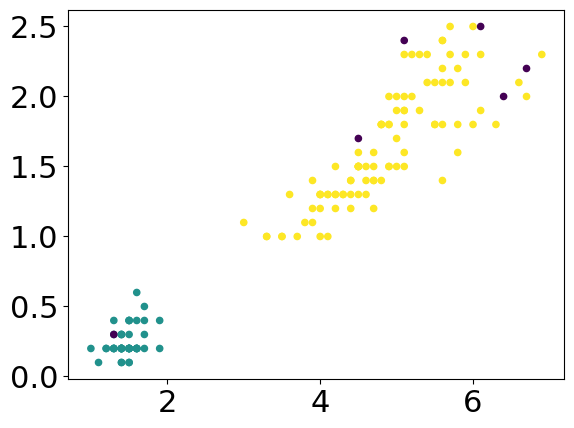

In [78]:
plt.scatter(df['petal_length'], df['petal_width'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Clustering Validation

In [116]:
print('Silhouette %s' % metrics.silhouette_score(X, dbscan.labels_))

Silhouette 0.555867914558612


In [117]:
metrics.adjusted_rand_score(classes, dbscan.labels_)  

0.5535820784912958

Knee Method to estimate the best eps

In [79]:
from scipy.spatial.distance import pdist, squareform

In [80]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.21561354 0.16810102 0.21761244 ... 0.226928   0.18710825 0.28409587]

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


In [81]:
dist.shape

(150, 150)

In [82]:
k = 4
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

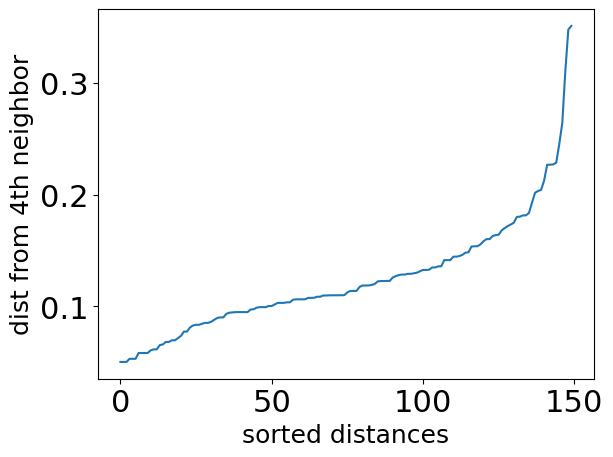

In [83]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

# Hierarchical Clustering

* method='single'
  $$
      d(u,v) = \\min(dist(u[i],v[j]))
  $$
  for all points $`i`$ in cluster $`u`$ and
  $`j`$ in cluster $`v`$. This is also known as the
  Nearest Point Algorithm.

* method='complete' assigns
  $$
      d(u, v) = \\max(dist(u[i],v[j]))
  $$
  for all points $`i`$ in cluster u and $`j`$ in
  cluster $`v`$. This is also known by the Farthest Point
  Algorithm or Voor Hees Algorithm.
  
* method='average'
  $$
      d(u,v) = \sum_{ij} \frac{d(u[i], v[j])}
                              {(|u|*|v|)}
  $$
  for all points $`i`$ and $`j`$ where $`|u|`$
  and $`|v|`$ are the cardinalities of clusters $`u`$
  and $`v`$, respectively. This is also called the UPGMA
  algorithm.

* method='weighted'
  $$
      d(u,v) = (dist(s,v) + dist(t,v))/2
  $$
  where cluster $u$ was formed with cluster $s$ and $t$ and $v$
  is a remaining cluster in the forest (also called WPGMA).

* method='centroid'
  $$
      dist(s,t) = ||c_s-c_t||_2
  $$
  where $`c_s`$ and $`c_t`$ are the centroids of
  clusters $`s`$ and $`t`$, respectively. When two
  clusters $`s`$ and $`t`$ are combined into a new
  cluster $`u`$, the new centroid is computed over all the
  original objects in clusters $`s`$ and $`t`$. The
  distance then becomes the Euclidean distance between the
  centroid of $`u`$ and the centroid of a remaining cluster
  $`v`$ in the forest. This is also known as the UPGMC
  algorithm.

* method='median' $`d(s,t)`$ like the ``centroid``
  method. When two clusters $`s`$ and $`t`$ are combined
  into a new cluster $`u`$, the average of centroids $s$ and $t$
  give the new centroid $`u`$. This is also known as the
  WPGMC algorithm.
  
* method='ward' Ward variance minimization algorithm.
  The new entry $`d(u,v)`$ is computed as follows,
  $$
      d(u,v) = \sqrt{\frac{|v|+|s|}
                          {T}d(v,s)^2
                  + \frac{|v|+|t|}
                          {T}d(v,t)^2
                  - \frac{|v|}
                          {T}d(s,t)^2}
  $$
  where $`u`$ is the newly joined cluster consisting of
  clusters $`s`$ and $`t`$, $`v`$ is an unused
  cluster in the forest, $`T=|v|+|s|+|t|`$, and
  $`|*|`$ is the cardinality of its argument. This is also
  known as the incremental algorithm.

In [2]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

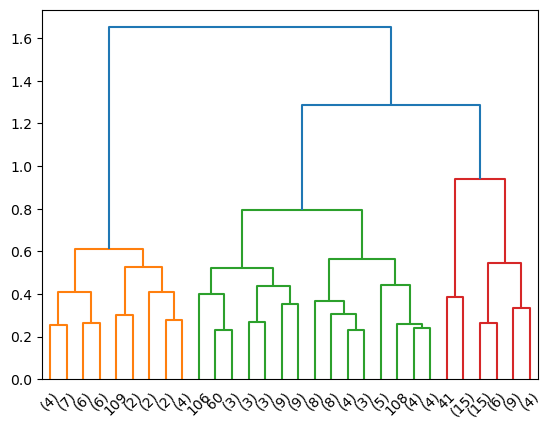

In [11]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

In [14]:
len(data_dist)

11175

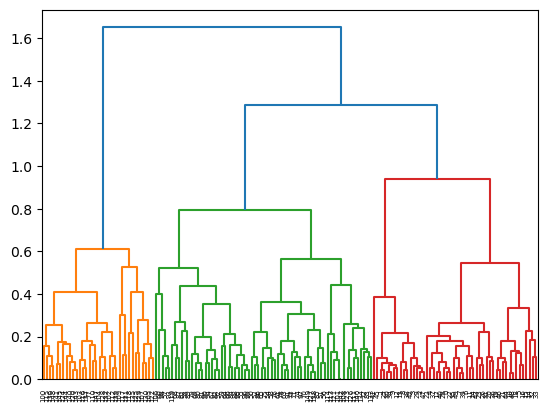

In [86]:
res = dendrogram(data_link, color_threshold=1.0)

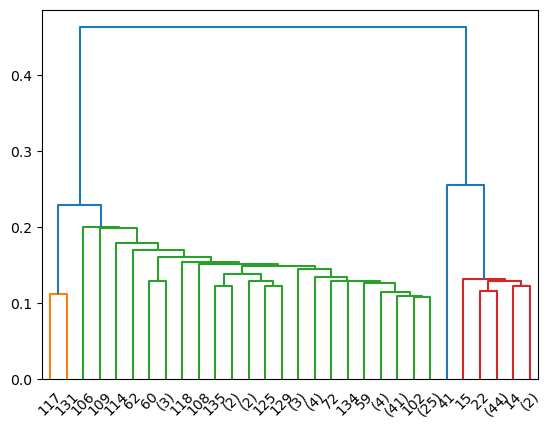

In [87]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

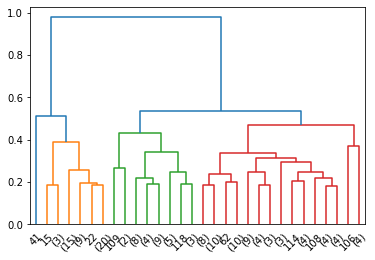

In [127]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.5, truncate_mode='lastp')